<a href="https://colab.research.google.com/github/kimjs2513/TensorFlow/blob/master/006_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Logistic Regression  텐서플로우로 구현하기

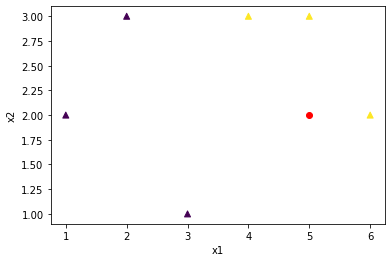

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.5781
Iter: 200, Loss: 0.5352
Iter: 300, Loss: 0.5056
Iter: 400, Loss: 0.4840
Iter: 500, Loss: 0.4673
Iter: 600, Loss: 0.4537
Iter: 700, Loss: 0.4421
Iter: 800, Loss: 0.4320
Iter: 900, Loss: 0.4229
Iter: 1000, Loss: 0.4145
Test Result = [[1]]
Testset Accuracy : 1.0000


In [18]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_train = [[1., 2.], [2., 3.], [3., 1.], [4., 3.], [5., 3.], [6., 2.]]
y_train = [[0.], [0.], [0.], [1.], [1.], [1.]]

x_test = [[5., 2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1, x2, c = colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c='red')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#0의 값을 가지는 것들은 보라색, 1의 값은 노란색으로 나타나며, 테스트 값은 빨간색으로 나타난다.

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)) #x_train데이터를 1행 2열의 행렬과, y_train데이터를 1행1열의 행렬로 만들어준다  # [0, 0] [0] * 6

W = tf.Variable(tf.zeros([2, 1]), name = 'weight')  
b = tf.Variable(tf.zeros([1]), name = 'bias')
#연산을 위해 W를 2행 1열의 행렬로 만들어주고, b를 1행 1열로 만들어 준다.
'''
X[0 0]W[0] + b[0] = y[0]
       [0]
'''

def logistic_regression(features): #sigmoid 함수 만들어주기
    hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(features, W) + b)) #mat.mul은 행렬곱을 의미
    # 1 / 1 + e^x
    # x = H(X) = XW + b
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    # cost(h(x), y) = -ylog(h(x)) - (1 - y)log(1 - h(x))
    return cost

# Gradient Descent
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) #cost값을 줄이는 것을 선언, Gradient descent

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32) #0.5이상이명 1, 0.5이하면 0 return
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype = tf.int32)) #predicted값과 labels값이 일치하면 accuracy 증가
    # equl: predicted, label 일치하는지 비교
    # cast : True -> 1, False -> 0 return
    # reduce_mean -> 해당 값들 평균
    return accuracy

def grad(features, labels):
    with tf.GradientTape() as tape: #gradienttape()를 이용해 미분값을 기록
        hypothesis = logistic_regression(features)
        loss_value = loss_fn(hypothesis, labels)
    return tape.gradient(loss_value, [W, b])

EPOCHS = 1001 #학습 횟수, iteration: 데이터를 몇번에 나누어서 주는지, batch size: iteration마다 주는 데이터 사이즈

for step in range(EPOCHS):
    for features, labels in iter(dataset.batch(len(x_train))):  # x_train 의 길이만큼 dataset 가져오기
        hypothesis = logistic_regression(features) #가설 함수 값
        grads = grad(features, labels) # 미분 값
        optimizer.apply_gradients(grads_and_vars = zip(grads, [W, b])) # W, b 값 업데이트
        
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(hypothesis, labels)))
            
test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test) > 0.5, dtype = tf.int32)))
print("Testset Accuracy : {:.4f}".format(test_acc))
